## 讀取Google Trend 資料

In [2]:
import pandas as pd
data = pd.read_csv('data/GoogleTrendsData.csv', index_col='Date', parse_dates=True)
data.head()

,djia,debt
Date,,
2004-01-14,10485.18,0.210000
2004-01-22,10528.66,0.210000
2004-01-28,10702.51,0.210000
2004-02-04,10499.18,0.213333
2004-02-11,10579.03,0.200000


## 繪製GoogleTrend 與股價的關係

Populating the interactive namespace from numpy and matplotlib


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000003B9D518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D351390>], dtype=object)

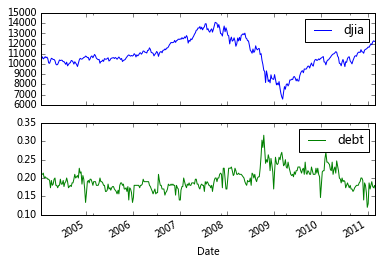

In [4]:
%pylab inline 
data.plot(subplots=True)

## 算出Search Word 三週的移動平均

In [5]:
data['debt_mavg'] = pd.rolling_mean(data.debt, 3)
data.head()

,djia,debt,debt_mavg
Date,,,
2004-01-14,10485.18,0.210000,NaN
2004-01-22,10528.66,0.210000,NaN
2004-01-28,10702.51,0.210000,0.210000
2004-02-04,10499.18,0.213333,0.211111
2004-02-11,10579.03,0.200000,0.207778


## 將三週平均資料平移一天

In [7]:
data['debt_mavg'] = data.debt_mavg.shift(1)
data.head(10)

,djia,debt,debt_mavg
Date,,,
2004-01-14,10485.18,0.210000,NaN
2004-01-22,10528.66,0.210000,NaN
2004-01-28,10702.51,0.210000,NaN
2004-02-04,10499.18,0.213333,NaN
2004-02-11,10579.03,0.200000,0.210000
2004-02-19,10714.88,0.203333,0.211111
2004-02-25,10609.62,0.200000,0.207778
2004-03-03,10678.14,0.200000,0.205555
2004-03-10,10529.48,0.196667,0.201111


## 設定買賣策略

In [8]:
data['order'] = 0
# 黃金交叉做多
data['order'][data.debt > data.debt_mavg] = -1 
# 死亡交叉做空
data['order'][data.debt < data.debt_mavg] = 1
data.head(10)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,djia,debt,debt_mavg,order
Date,,,,
2004-01-14,10485.18,0.210000,NaN,0
2004-01-22,10528.66,0.210000,NaN,0
2004-01-28,10702.51,0.210000,NaN,0
2004-02-04,10499.18,0.213333,NaN,0
2004-02-11,10579.03,0.200000,0.210000,1
2004-02-19,10714.88,0.203333,0.211111,1
2004-02-25,10609.62,0.200000,0.207778,1
2004-03-03,10678.14,0.200000,0.205555,1
2004-03-10,10529.48,0.196667,0.201111,1


## 計算道瓊報酬

In [9]:
data['ret_djia'] = data.djia.pct_change()
data.head()

,djia,debt,debt_mavg,order,ret_djia
Date,,,,,
2004-01-14,10485.18,0.210000,NaN,0,NaN
2004-01-22,10528.66,0.210000,NaN,0,0.004147
2004-01-28,10702.51,0.210000,NaN,0,0.016512
2004-02-04,10499.18,0.213333,NaN,0,-0.018998
2004-02-11,10579.03,0.200000,0.21,1,0.007605


## 根據買賣日調整

In [10]:
data['ret_djia'] = data['ret_djia'].shift(-1)

## 計算根據Search Term 買賣的報酬

In [11]:
data['ret_google'] = data.order * data.ret_djia
data.head(10)

,djia,debt,debt_mavg,order,ret_djia,ret_google
Date,,,,,,
2004-01-14,10485.18,0.210000,NaN,0,0.004147,0.000000
2004-01-22,10528.66,0.210000,NaN,0,0.016512,0.000000
2004-01-28,10702.51,0.210000,NaN,0,-0.018998,-0.000000
2004-02-04,10499.18,0.213333,NaN,0,0.007605,0.000000
2004-02-11,10579.03,0.200000,0.210000,1,0.012841,0.012841
2004-02-19,10714.88,0.203333,0.211111,1,-0.009824,-0.009824
2004-02-25,10609.62,0.200000,0.207778,1,0.006458,0.006458
2004-03-03,10678.14,0.200000,0.205555,1,-0.013922,-0.013922
2004-03-10,10529.48,0.196667,0.201111,1,-0.040514,-0.040514


## 觀察資金變化

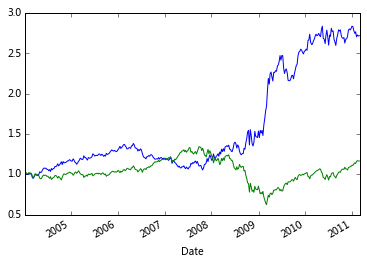

In [12]:
(1 + data.ret_google).cumprod().plot();
(1 + data.ret_djia).cumprod().plot();